# Dataset Iterators

The dataset is logged in 3 seperated sources:
1. Android Phone(s)
    a. CSV
    b. Video File
2. Panda (CAN BUS Data)
    a. CSV file only
3. DVR Video
    a. Multiple Video Streams
    b. Log files

The `dataset_iterators.py` file provides classes to easily access the recorded data as panda's `DataFrame` objects

In [12]:
from matplotlib import pyplot as plt 
import binascii

from dataset_helper import dataset_iterators

## Pandas CSV Iterator

The raw CAN data comes in with the format `timestamp,CAN_ID,MESSAGE` and is logges as such for the sake of maintaining high speed data logging. The `PandaDatasetIterator` creates and caches a new CSV of the format `timestamp,ID1,ID2,...,IDn` which is easier to use for plotting.

In [2]:
panda_iter = dataset_iterators.PandaDatasetIterator()
panda_iter

Init path: panda_logs/2022-05-24_21:59:16.791545.csv


----------------------------------------------------
PandaDatasetIterator('panda_logs/2022-05-24_21:59:16.791545.csv')
----------------------------------------------------
self.fps:        	445.125954952173
self.frame_count:	233096
self.start_time_csv:	2022-05-24 21:59:16.797465
self.end_time_csv:	2022-05-24 22:08:00.460481
self.duration:    	0:08:43.663016
----------------------------------------------------

In [16]:
panda_iter.csv_dat

,timestamp,57,310,314,319,344,380,476,356,398,...,660,800,804,983,1036,1108,1729,773,884,1029
0,1.653410e+09,"(17196, ""b'002a'"", 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.653410e+09,"(27194, ""b'000c'"", 0)","(29770, ""b'1000000d00000000'"", 0)","(29892, ""b'0000800000000002'"", 0)","(30016, ""b'007a00f90000000c'"", 0)","(30138, ""b'000000000000000a'"", 0)","(30262, ""b'0000031c00000004'"", 0)","(30386, ""b'02031c2a'"", 0)","(30546, ""b'040040691600002d'"", 0)","(30665, ""b'00003e'"", 0)",...,"(25585, ""b'0016400242e50012'"", 0)","(30469, ""b'000021'"", 0)","(30742, ""b'8f7202b60000002a'"", 0)","(30860, ""b'b00000000000007f'"", 0)","(30983, ""b'014d414b474d322f'"", 0)","(31099, ""b'64dc02753025'"", 0)",NaN,NaN,NaN,NaN
2,1.653410e+09,"(47233, ""b'000c'"", 0)","(49758, ""b'1000000d00000000'"", 0)","(44880, ""b'000080000000003f'"", 0)","(45003, ""b'007a00f900000039'"", 0)","(45124, ""b'0000000000000037'"", 0)","(45249, ""b'0000031c00000031'"", 0)","(40375, ""b'02031c39'"", 0)","(45458, ""b'040040691600001e'"", 0)","(45733, ""b'00002f'"", 0)",...,"(45615, ""b'0016400242e50021'"", 0)","(30469, ""b'000021'"", 0)","(30742, ""b'8f7202b60000002a'"", 0)","(30860, ""b'b00000000000007f'"", 0)","(30983, ""b'014d414b474d322f'"", 0)","(31099, ""b'64dc02753025'"", 0)","(31197, ""b'14'"", 0)","(47300, ""b'8026'"", 0)",NaN,NaN
3,1.653410e+09,"(6649, ""b'001b'"", 0)","(9214, ""b'1000000d0000001f'"", 0)","(9336, ""b'0000800000000011'"", 0)","(4462, ""b'007a00f90000000c'"", 0)","(4584, ""b'000000000000000a'"", 0)","(4708, ""b'0000031d00000003'"", 0)","(4833, ""b'02031d29'"", 0)","(4915, ""b'040040691600002d'"", 0)","(5094, ""b'00003e'"", 0)",...,"(8, ""b'0016400242e50030'"", 0)","(30469, ""b'000021'"", 0)","(30742, ""b'8f7202b60000002a'"", 0)","(30860, ""b'b00000000000007f'"", 0)","(30983, ""b'014d414b474d322f'"", 0)","(31099, ""b'64dc02753025'"", 0)","(31197, ""b'14'"", 0)","(47300, ""b'8026'"", 0)","(55561, ""b'0000000000000a'"", 0)",NaN
4,1.653410e+09,"(31654, ""b'002a'"", 0)","(34208, ""b'1000000d0000002e'"", 0)","(29330, ""b'0000800000000011'"", 0)","(29452, ""b'007a00f90000001b'"", 0)","(29575, ""b'0000000000000019'"", 0)","(29700, ""b'0000031d00000012'"", 0)","(24828, ""b'02031d0b'"", 0)","(30001, ""b'040040691600003c'"", 0)","(30121, ""b'000001'"", 0)",...,"(20610, ""b'0016400242e50003'"", 0)","(15033, ""b'000030'"", 0)","(15186, ""b'8f7202b600000039'"", 0)","(30860, ""b'b00000000000007f'"", 0)","(30983, ""b'014d414b474d322f'"", 0)","(31099, ""b'64dc02753025'"", 0)","(31197, ""b'14'"", 0)","(31721, ""b'8035'"", 0)","(55561, ""b'0000000000000a'"", 0)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233091,1.653410e+09,"(24072, ""b'002a'"", 0)","(25517, ""b'0000000800000006'"", 0)","(25640, ""b'000000000000000a'"", 0)","(25763, ""b'0029008d00000005'"", 0)","(25884, ""b'000000000000000a'"", 0)","(26008, ""b'0000031b00000005'"", 0)","(26207, ""b'02031b2b'"", 0)","(24734, ""b'0400006916000012'"", 0)","(26131, ""b'000010'"", 0)",...,"(24890, ""b'0016400242e50021'"", 0)","(51843, ""b'000021'"", 0)","(51920, ""b'8f72092f00000023'"", 0)","(52038, ""b'b00000000000007f'"", 0)","(52161, ""b'014d414b474d322f'"", 0)","(52277, ""b'64dc02753025'"", 0)","(52375, ""b'14'"", 0)","(49754, ""b'8017'"", 0)","(50625, ""b'00000000000037'"", 0)","(50776, ""b'000000000000003c'"", 0)"
233092,1.653410e+09,"(29071, ""b'0039'"", 0)","(25517, ""b'0000000800000006'"", 0)","(25640, ""b'000000000000000a'"", 0)","(25763, ""b'0029008d00000005'"", 0)","(25884, ""b'000000000000000a'"", 0)","(26008, ""b'0000031b00000005'"", 0)","(26207, ""b'02031b2b'"", 0)","(24734, ""b'0400006916000012'"", 0)","(26131, ""b'000010'"", 0)",...,"(24890, ""b'0016400242e50021'"", 0)","(51843, ""b'000021'"", 0)","(51920, ""b'8f72092f00000023'"", 0)","(52038, ""b'b00000000000007f'"", 0)","(52161, ""b'014d414b474d322f'"", 0)","(52277, ""b'64dc02753025'"", 0)","(52375, ""b'14'"", 0)","(49754, ""b'8017'"", 0)","(5062

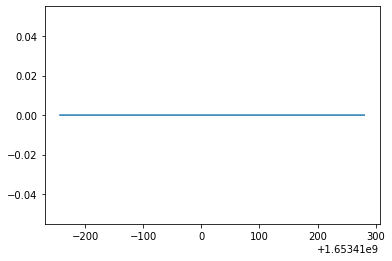

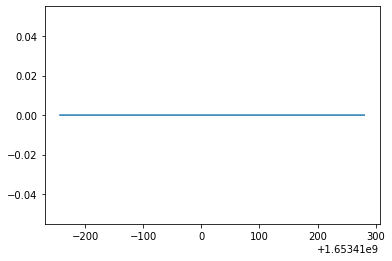

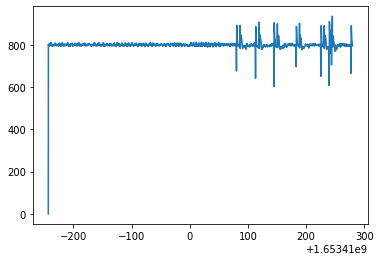

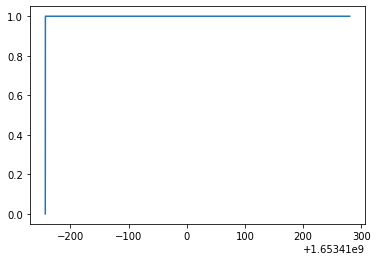

In [22]:
dat = {
    't':[],
    'b':[],
    'r':[],
    'sb':[],
    'ts':[]
}
throttle = 0
brake = 0
rpm = 0
seat_belt = 0

#for frame in panda_iter[::100]:
for frame_id in range(0, len(panda_iter), 100):
    frame = panda_iter[frame_id]

    if str(frame['314'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['314'])[1]))
        throttle = hex_frame[1]

    if str(frame['773'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['773'])[1]))
        seat_belt = hex_frame[0]>>7

    if str(frame['380'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['380'])[1]))
        rpm = int.from_bytes(hex_frame[2:4], 'big') # * 15000 / 255.0
        brake = hex_frame[4] & 1

    if str(frame['344'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['344'])[1]))
        transmission_speed = hex_frame[1] * 0.002759506 # m/s

    dat['t'].append(throttle)
    dat['b'].append(brake)
    dat['r'].append(rpm)
    dat['sb'].append(seat_belt)
    dat['ts'].append(frame["timestamp"])

plt.plot(dat['ts'], dat['t'])
plt.show()
plt.plot(dat['ts'], dat['b'])
plt.show()
plt.plot(dat['ts'], dat['r'])
plt.show()
plt.plot(dat['ts'], dat['sb'])
plt.show()

## Phone Data Iterator

The Android App saved the IMU and GPS data in csv format along with a video to accompany it. The video has a known duration, start time and a fixed frame rate. Using these, the `PhoneDatasetIterator` can generate a mapping from timestamp to video frame.

In [4]:
phone_iter = dataset_iterators.PhoneDatasetIterator()
phone_iter

Init path: dataset/1652937970859


----------------------------------------------------
PhoneDatasetIterator('dataset/1652937970859')
----------------------------------------------------
self.fps:        	29.979631937849035
self.frame_count:	11757
self.start_time_csv:	2022-05-19 10:56:12.594000
self.end_time_csv:	2022-05-19 11:02:45.792000
self.expected_duration:	0:06:33.198000
self.expected_fps:	29.900965925564222
----------------------------------------------------

In [5]:
phone_iter.csv_dat

,Timestamp,Longitude,Latitude,RotationV X,RotationV Y,RotationV Z,RotationV W,RotationV Acc,linear_acc_x,linear_acc_y,linear_acc_z,heading,speed
0,1652937972594,77.528109,12.912560,-0.598315,-0.483702,-0.482872,0.418194,0.0,0.019265,-0.003543,0.017380,188.0,0.00
1,1652937972647,77.528109,12.912560,-0.598342,-0.483459,-0.482919,0.418381,0.0,0.019265,-0.003543,0.017380,188.0,0.00
2,1652937972691,77.528109,12.912560,-0.598342,-0.483459,-0.482919,0.418381,0.0,0.019265,-0.003543,0.017380,188.0,0.00
3,1652937972747,77.528109,12.912560,-0.598342,-0.483459,-0.482919,0.418381,0.0,-0.011671,-0.001532,-0.007036,188.0,0.00
4,1652937972793,77.528109,12.912560,-0.598409,-0.482874,-0.482880,0.419008,0.0,-0.011671,-0.001532,-0.007036,188.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834,1652938365591,77.522736,12.909644,-0.672013,-0.303993,-0.629749,0.243727,0.0,0.278518,-0.154567,-0.042929,227.0,2.36
7835,1652938365669,77.522736,12.909644,-0.672013,-0.303993,-0.629749,0.243727,0.0,0.278518,-0.154567,-0.042929,227.0,2.36
7836,1652938365692,77.522736,12.909644,-0.672013,-0.303993,-0.629749,0.243727,0.0,0.278518,-0.154567,-0.042929,227.0,2.36
7837,1652938365769,77.522736,12.909644,-0.672013,-0.303993,-0.629749,0.243727,0.0,0.278518,-0.154567,-0.042929,227.0,2.36


Timestamp        1.652938e+12
Longitude        7.752811e+01
Latitude         1.291256e+01
RotationV X     -5.986466e-01
RotationV Y     -4.825951e-01
RotationV Z     -4.832644e-01
RotationV W      4.185450e-01
RotationV Acc    0.000000e+00
linear_acc_x     6.189346e-03
linear_acc_y     3.433734e-03
linear_acc_z     1.557243e-02
heading          1.880000e+02
speed            0.000000e+00
Name: 10, dtype: float64


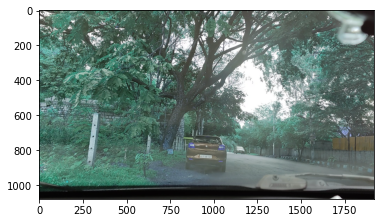

In [11]:
phone_data, phone_frame = phone_iter[10]
print(phone_data)
plt.imshow(phone_frame)